In [71]:
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

In [2]:
ids = [i for i in range(1,1001)]

In [3]:
folds = np.array_split(ids, 3)

In [4]:
len(folds)

3

In [11]:
#folds

## Make fold CSVs for real data

In [5]:
img_dir = "/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_images"
mask_dir = "/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks"

In [6]:
def make_df(img_dir, mask_dir, fold_ids):

    df = pd.DataFrame(columns=["image_path", "mask_path"])
    
    

    for data_id in fold_ids:

        img_path = os.path.join(img_dir, str(data_id) + ".jpg")
        mask_path = os.path.join(mask_dir, str(data_id) + ".jpg")

        if os.path.exists(img_path) and os.path.exists(mask_path):

            df = df.append({"image_path": img_path,
                            "mask_path": mask_path
                            }, ignore_index=True)
        else:
            print("Found mismatch files")
            print("Image path=", img_path)
            print("mask_path", mask_path)

    return df

In [8]:
def make_and_save_folds(img_dir, mask_dir, folds_id_array, basic_name="REAL"):
    
    for f in range(len(folds_id_array)):
        fold_ids = folds_id_array[f]
        df = make_df(img_dir, mask_dir, fold_ids)
        
        df.to_csv(f"{basic_name}_fold_{f}.csv", index=False, header=True)

In [9]:
make_and_save_folds(img_dir, mask_dir, folds, basic_name="REAL")

In [7]:
#df = make_df(img_dir, mask_dir, folds[0])

In [14]:
#df.to_csv("test.csv",index=False, header=True)

## MAKE CVC-clinicdb csvs

In [80]:
img_dir = "/work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/Original"
mask_dir = "/work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/ground_truth"

In [81]:
from skimage import io


In [82]:
def make_df(img_dir, mask_dir):

    df = pd.DataFrame(columns=["image_path", "mask_path"])
    
    

    for img_name in tqdm(os.listdir(img_dir)):

        img_path = os.path.join(img_dir, str(img_name))
        mask_path = os.path.join(mask_dir, str(img_name))
        
        # converting tif to png
        img = io.imread(img_path)
        mask = io.imread(mask_path)
        
        img_path_png = img_path.split(".")[0] + ".png"
        mask_path_png = mask_path.split(".")[0] + ".png"
        
        io.imsave(img_path_png, img)
        io.imsave(mask_path_png, mask)
        
        os.remove(img_path)
        os.remove(mask_path)
        

        if os.path.exists(img_path_png) and os.path.exists(mask_path_png):
            

            df = df.append({"image_path": img_path_png,
                            "mask_path": mask_path_png
                            }, ignore_index=True)
        else:
            print("Found mismatch files")
            print("Image path=", img_path_png)
            print("mask_path", mask_path_png)

    return df

In [83]:
def make_and_save_folds(img_dir, mask_dir, basic_name="CVC_Clinic_DB"):
        df = make_df(img_dir, mask_dir)
        df.to_csv(f"{basic_name}.csv", index=False, header=True)

In [84]:
make_and_save_folds(img_dir, mask_dir, basic_name="CVC_Clinic_DB")

100%|██████████| 612/612 [01:46<00:00,  5.75it/s]


## MAKE CSV of ETIS_Larib

In [ ]:
img_dir = "/work/vajira/DATA/sinGAN_polyps/ETIS-Larib/ETIS-LaribPolypDB/ETIS-LaribPolypDB"
mask_dir = "/work/vajira/DATA/sinGAN_polyps/ETIS-Larib/ETIS-LaribPolypDB/groud_truth"

In [ ]:
from skimage import io

In [88]:
def make_df(img_dir, mask_dir):

    df = pd.DataFrame(columns=["image_path", "mask_path"])
    
    

    for img_name in tqdm(os.listdir(img_dir)):

        img_path = os.path.join(img_dir, str(img_name))
        mask_path = os.path.join(mask_dir, "p"+str(img_name)) # check the dataset to know why "p"
        
        # converting tif to png
        img = io.imread(img_path)
        mask = io.imread(mask_path)
        
        img_path_png = img_path.split(".")[0] + ".png"
        mask_path_png = mask_path.split(".")[0] + ".png"
        
        io.imsave(img_path_png, img)
        io.imsave(mask_path_png, mask)
        
        os.remove(img_path)
        os.remove(mask_path)
        

        if os.path.exists(img_path_png) and os.path.exists(mask_path_png):
            

            df = df.append({"image_path": img_path_png,
                            "mask_path": mask_path_png
                            }, ignore_index=True)
        else:
            print("Found mismatch files")
            print("Image path=", img_path_png)
            print("mask_path", mask_path_png)

    return df

In [89]:
make_and_save_folds(img_dir, mask_dir, basic_name="ETIS_Larib_DB")

 66%|██████▋   | 130/196 [08:03<04:05,  3.72s/it]


KeyboardInterrupt: 

## Make fold CSVs for synthetic data

In [5]:
src_dir = "/work/vajira/DATA/sinGAN_polyps/singan_out"


In [6]:
def make_df_from_synthetic(src_dir, fold_ids, scales = [0, 1], num_samples_per_img=2):
    
    df = pd.DataFrame(columns=["image_path", "mask_path"])
    
    
    for data_id in fold_ids:
        
        for n in range(num_samples_per_img):
            
            for scale in scales:
                
                img_path = f"{src_dir}/chk_id_{data_id}_gen_scale_{scale}_{n}_img.png"
                mask_path = f"{src_dir}/chk_id_{data_id}_gen_scale_{scale}_{n}_mask.png"
                
                
                if os.path.exists(img_path) and os.path.exists(mask_path):
                    
                    df = df.append({"image_path": img_path,
                            "mask_path": mask_path
                            }, ignore_index=True)
                else:
                    print("Found mismatch files")
                    print("Image path=", img_path)
                    print("mask_path", mask_path)
                    
    return df
    
    

In [7]:
def make_and_save_folds_synth(src_dir, folds_id_array, scales = [0], num_samples_per_img=1, basic_name="FAKE_scale_0_num_img_1"):
    
    for f in range(len(folds_id_array)):
        fold_ids = folds_id_array[f]
        df = make_df_from_synthetic(src_dir, fold_ids, scales, num_samples_per_img)
        
        df.to_csv(f"{basic_name}_fold_{f}.csv", index=False, header=True)

In [25]:
#make_and_save_folds_synth(src_dir, folds, scales = [0],num_samples_per_img=6,  basic_name="FAKE_scale_0_num_img_6")

In [15]:
#df =make_df_from_synthetic(src_dir, folds[0])

In [16]:
#df

In [17]:
#df.to_csv("test_2.csv",index=False, header=True)

## PIL image read

In [26]:
from PIL import Image

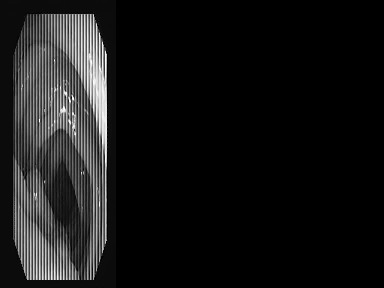

In [38]:
Image.open("/work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/Original/1.jpg")

In [44]:
import cv2
import matplotlib.pyplot as plt

In [55]:
out = cv2.imread("/work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/Original/1.tif")

In [64]:
"/work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/Original/1.tif".split(".")

['/work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/Original/1',
 'tif']

In [56]:
out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

In [57]:
out.shape

(288, 384, 3)

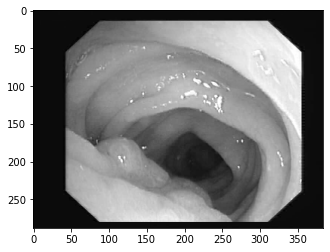

In [58]:
plt.imshow(out)

In [40]:
imread("/work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/Original/1.tif")

NameError: name 'imread' is not defined

In [59]:
from skimage import io
im = io.imread("/work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/Original/1.tif")

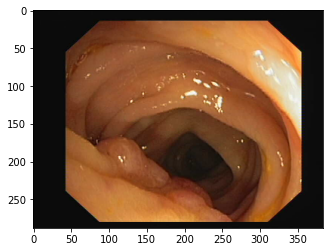

In [60]:
plt.imshow(im)

In [62]:
io.imsave("test.png", im)